In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load datasets
graduates_data = pd.read_csv('data/graduates-major-data.csv', sep=';')
students_data = pd.read_csv('data/students-major-data.csv', sep=';')

# Define key variables for analysis
P_WOJ = graduates_data['P_WOJ']  # Województwo lokalizacji jednostki dydaktycznej
P_ME_ZAR = graduates_data['P_ME_ZAR']  # Mediana wynagrodzeń absolwentów
P_WWZ = graduates_data['P_WWZ']  # Względny Wskaźnik Zarobków
P_WWB = graduates_data['P_WWB']  # Względny Wskaźnik Bezrobocia
P_WWB_DOSW = graduates_data['P_WWB_DOSW']  # Wskaźnik Bezrobocia dla absolwentów z doświadczeniem
P_WWB_NDOSW = graduates_data['P_WWB_NDOSW']  # Wskaźnik Bezrobocia dla absolwentów bez doświadczenia
P_CZAS_PRACA_DOSW = graduates_data['P_CZAS_PRACA_DOSW']  # Czas do pierwszej pracy dla absolwentów z doświadczeniem
P_CZAS_PRACA_NDOSW = graduates_data['P_CZAS_PRACA_NDOSW']  # Czas do pierwszej pracy dla absolwentów bez doświadczenia
P_ME_ZAR_DOSW = graduates_data['P_ME_ZAR_DOSW']  # Mediana wynagrodzeń dla absolwentów z doświadczeniem
P_ME_ZAR_NDOSW = graduates_data['P_ME_ZAR_NDOSW']  # Mediana wynagrodzeń dla absolwentów bez doświadczenia
P_N = students_data['P_N']  # Liczba studentów
P_ABS = graduates_data['P_N'] # Liczba absolwentów
P_POZIOM = graduates_data['P_POZIOM']  # Poziom studiów
P_FORMA = graduates_data['P_FORMA']  # Forma studiów
P_ROKDYP = graduates_data['P_ROKDYP'] # Rok ukończenia studiów
P_ROK_OD = students_data['P_ROK_OD'] # Rok rozpoczęcia studiów
P_KIERUNEK_NAZWA = graduates_data['P_KIERUNEK_NAZWA'] # Pełna nazwa kierunku
P_ME_ZAR_P1 = graduates_data['P_ME_ZAR_P1'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 1 roku po uzyskaniu dyplomu
P_ME_ZAR_P2 = graduates_data['P_ME_ZAR_P2'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 2 roku po uzyskaniu dyplomu
P_ME_ZAR_P3 = graduates_data['P_ME_ZAR_P3'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 3 roku po uzyskaniu dyplomu
P_ME_ZAR_P4 = graduates_data['P_ME_ZAR_P4'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 4 roku po uzyskaniu dyplomu
P_ME_ZAR_P5 = graduates_data['P_ME_ZAR_P5'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 5 roku po uzyskaniu dyplomu

/tmp/ipykernel_24592/1356218368.py:7: DtypeWarning: Columns (13,14,15,16,17,18,19,57,59,61,63,65,67,81,83,85,87,89,91,105,106,108,109,111,112,114,115,117,118,120,121,135,136,138,139,141,142,144,145,147,148,150,151,165,166,168,169,171,172,174,175,177,178,180,181,195,196,198,199,201,202,204,205,207,208,210,211,225,226,229,230,232,233,235,236,238,239,241,242,256,257,259,260,262,263,265,266,268,269,271,272,288,299,300,301,303,304,306,307,309,310,312,313,315,316,330,331,337,338,340,341,343,344,346,347,349,350,364,365,367,368,370,371,373,374,376,377,379,380,394,395,403,404,406,407,409,410,412,413,415,416,430,431,433,434,436,437,439,440,442,443,445,446) have mixed types. Specify dtype option on import or set low_memory=False.
  graduates_data = pd.read_csv('data/graduates-major-data.csv', sep=';')
/tmp/ipykernel_24592/1356218368.py:8: DtypeWarning: Columns (9,18,23,30,64,71,78,85,92,99,106,113,120) have mixed types. Specify dtype option on import or set low_memory=False.
  students_data = pd.

<Figure size 1400x700 with 0 Axes>

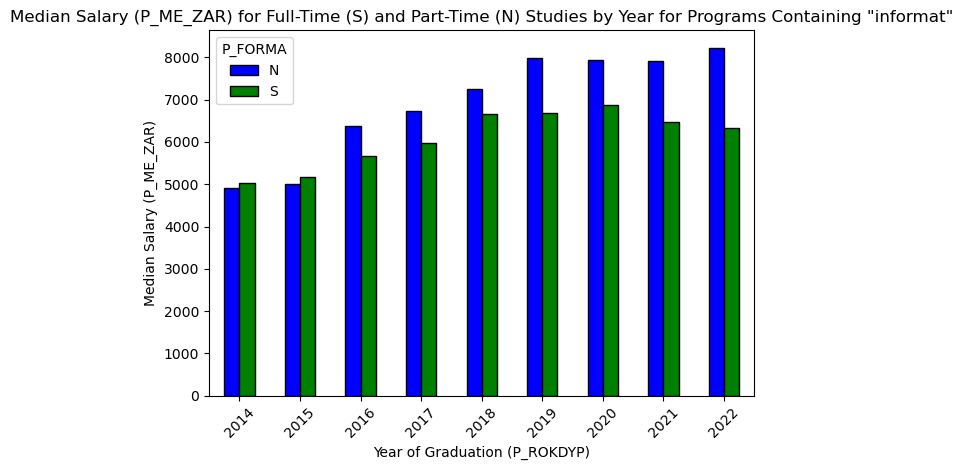

In [44]:
# Filter the data to only include programs that contain the value in `var` (e.g., 'filologia')
var = 'informat'
temp_data = graduates_data[graduates_data['P_KIERUNEK_NAZWA'].str.contains(var, case=False, na=False)]

# Create a temporary DataFrame to avoid modifying graduates_data, and include P_ME_ZAR
temp_data = temp_data[['P_FORMA', 'P_ME_ZAR', 'P_ROKDYP']].copy()

temp_data['P_ME_ZAR'] = temp_data['P_ME_ZAR'].str.replace(',', '.').astype(float)
# Ensure P_ME_ZAR and P_ROKDYP are numeric and drop rows with NaN in these columns
# temp_data['P_ME_ZAR'] = pd.to_numeric(temp_data['P_ME_ZAR'], errors='coerce')
# temp_data['P_ROKDYP'] = pd.to_numeric(temp_data['P_ROKDYP'], errors='coerce')
# temp_data = temp_data.dropna(subset=['P_ME_ZAR', 'P_ROKDYP'])

# Group data by year and form of study, calculating the median salary
grouped_data = temp_data.groupby(['P_ROKDYP', 'P_FORMA'])['P_ME_ZAR'].median().reset_index()

# Pivot data for easy plotting
pivot_data = grouped_data.pivot(index='P_ROKDYP', columns='P_FORMA', values='P_ME_ZAR')

# Plot the median salary for each year as a bar chart
plt.figure(figsize=(14, 7))
ax = pivot_data.plot(kind='bar', stacked=False, color={"S": "green", "N": "blue"}, edgecolor="black")
plt.title(f'Median Salary (P_ME_ZAR) for Full-Time (S) and Part-Time (N) Studies by Year for Programs Containing "{var}"')
plt.xlabel('Year of Graduation (P_ROKDYP)')
plt.ylabel('Median Salary (P_ME_ZAR)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

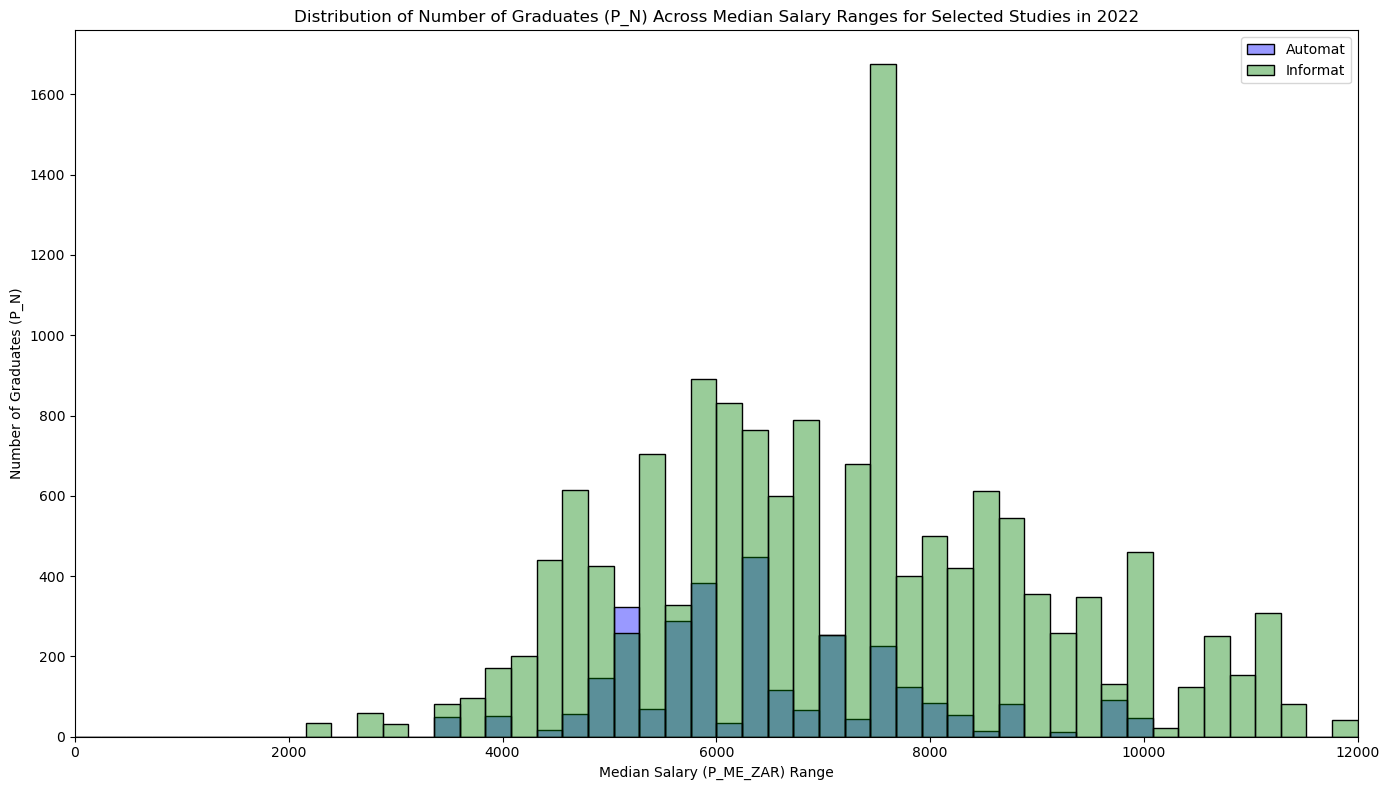

In [54]:
# Set desired year and variables
desired_year = 2022  # Replace with your desired graduation year
num_bins = 50
x_range = (0, 12000)

# Define a function to filter data for multiple study programs and plot their distributions
def plot_comparison_of_studies(graduates_data, study_names, desired_year, num_bins=num_bins, x_range=x_range):
    plt.figure(figsize=(14, 8))

    colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']  # Add more colors as needed

    for i, study_name in enumerate(study_names):
        # Filter the data to only include programs that match the specified name
        filtered_data = graduates_data[graduates_data['P_KIERUNEK_NAZWA'].str.contains(study_name, case=False, na=False)]
        
        # Create a temporary DataFrame
        filtered_data = filtered_data[['P_ME_ZAR', 'P_N', 'P_ROKDYP']].copy()
        
        # Replace commas with dots in P_ME_ZAR and ensure numeric types
        filtered_data['P_ME_ZAR'] = filtered_data['P_ME_ZAR'].str.replace(',', '.').astype(float)
        
        # Filter data for the specific graduation year
        filtered_data = filtered_data[filtered_data['P_ROKDYP'] == desired_year]
        
        # Plot the histogram with KDE overlay for each study program
        sns.histplot(
            data=filtered_data, 
            x='P_ME_ZAR', 
            weights='P_N', 
            bins=num_bins, 
            binrange=x_range, 
            kde=False, 
            color=colors[i % len(colors)], 
            edgecolor="black", 
            alpha=0.4, 
            stat="count", 
            label=study_name.capitalize()
        )

    plt.title(f'Distribution of Number of Graduates (P_N) Across Median Salary Ranges for Selected Studies in {desired_year}')
    plt.xlabel('Median Salary (P_ME_ZAR) Range')
    plt.ylabel('Number of Graduates (P_N)')
    plt.xlim(x_range)
    plt.legend()
    plt.tight_layout()
    plt.show()

# List of study program names to compare
study_names = ['automat', 'informat']

# Plot comparison for the selected study programs
plot_comparison_of_studies(graduates_data, study_names, desired_year)